In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv("/content/train.csv", encoding_errors="ignore")
test_data = pd.read_csv("/content/test.csv", encoding_errors="ignore")

In [3]:
print("The shape of the training data is :",train_data.shape)
train_data.head()

The shape of the training data is : (29451, 12)


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
print("The shape of the test data is :",test_data.shape)
test_data.head()

The shape of the test data is : (68720, 11)


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [5]:
train_data.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [6]:
test_data.dtypes

POSTED_BY              object
UNDER_CONSTRUCTION      int64
RERA                    int64
BHK_NO.                 int64
BHK_OR_RK              object
SQUARE_FT             float64
READY_TO_MOVE           int64
RESALE                  int64
ADDRESS                object
LONGITUDE             float64
LATITUDE              float64
dtype: object

In [7]:
train_data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [8]:
test_data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
count,68720.000000,68720.000000,68720.000000,6.872000e+04,68720.000000,68720.000000,68720.000000,68720.000000
mean,0.176557,0.316531,2.388198,2.762419e+03,0.823443,0.933498,21.288045,76.919388
std,0.381296,0.465126,0.864577,1.640991e+05,0.381296,0.249159,6.179034,10.100950
min,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,-38.391261,-118.354100
25%,0.000000,0.000000,2.000000,9.000310e+02,1.000000,1.000000,18.452663,73.798100
50%,0.000000,0.000000,2.000000,1.174982e+03,1.000000,1.000000,20.933260,77.324966
75%,0.000000,1.000000,3.000000,1.550265e+03,1.000000,1.000000,26.888396,78.000723
max,1.000000,1.000000,31.000000,4.016393e+07,1.000000,1.000000,65.183330,175.278040


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB


In [11]:
# Defining a function to separate categorical and numerical data 
def separate_categorical_and_continious(data):
    categorical_cols, numerical_cols = [] , []
    for cols in data.columns:
        if data[cols].dtypes == "object":
            categorical_cols.append(cols)
        else:
            numerical_cols.append(cols)
    return categorical_cols, numerical_cols

# Separating categorical and numerical data from train and test data
categorical_cols_train, numerical_cols_train = separate_categorical_and_continious(train_data)
categorical_cols_test, numerical_cols_test = separate_categorical_and_continious(test_data)

def univariate_analysis(data):
    # Plot cat charts --> bar and pie
    # Plot contnious charts --> historam and boxplot
    for cols in data.columns:
        # If the col is representing a category
        if data[cols].dtypes == "object":
            plt.figure(figsize = [10,8])
            # This is for the first subplot
            plt.subplot(1,2,1)
            sns.barplot(x=data[cols].value_counts().index,
                        y=data[cols].value_counts().values,
                        color = "darkblue",
                        orient = "v")
            # This is for the second subplot
            plt.subplot(1,2,2)
            plt.pie(labels=data[cols].value_counts().index,
                    x=data[cols].value_counts().values,
                    autopct = '%1.2f%%')
            plt.title("Categorical Distribution of the {}".format(cols))
            plt.show();
            
        # If the col is representing a numerical field
        else:
            plt.figure(figsize = [10,8])
            # This is for the first subplot
            plt.subplot(1,2,1)
            sns.histplot(x = cols, data = data, color = "darkblue")
            # This is for the second subplot
            plt.subplot(1,2,2)
            sns.boxplot(x = cols, data = data, color = "darkblue")
            plt.title("Continious Distribution of the {}".format(cols))
            plt.show();

In [12]:
# # univariate_analysis on training
# univariate_analysis(train_data)

In [13]:
# # univariate_analysis on test
# univariate_analysis(test_data)

In [14]:
categorical_cols_train, numerical_cols_train

(['POSTED_BY', 'BHK_OR_RK', 'ADDRESS'],
 ['UNDER_CONSTRUCTION',
  'RERA',
  'BHK_NO.',
  'SQUARE_FT',
  'READY_TO_MOVE',
  'RESALE',
  'LONGITUDE',
  'LATITUDE',
  'TARGET(PRICE_IN_LACS)'])

In [15]:
categorical_cols_test, numerical_cols_test

(['POSTED_BY', 'BHK_OR_RK', 'ADDRESS'],
 ['UNDER_CONSTRUCTION',
  'RERA',
  'BHK_NO.',
  'SQUARE_FT',
  'READY_TO_MOVE',
  'RESALE',
  'LONGITUDE',
  'LATITUDE'])

In [17]:
# encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_data['POSTED_BY'] = encoder.fit_transform(train_data['POSTED_BY'])

In [18]:
test_data['POSTED_BY'] = encoder.fit_transform(test_data['POSTED_BY'])

In [19]:
categorical_cols = ['BHK_OR_RK', 'ADDRESS']
for col in categorical_cols:
    train_data[col] = encoder.fit_transform(train_data[col])
    test_data[col] = encoder.fit_transform(test_data[col])

In [20]:
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,0,1300.236407,1,1,2844,12.969910,77.597960,55.0
1,1,0,0,2,0,1275.000000,1,1,6576,12.274538,76.644605,51.0
2,2,0,0,2,0,933.159722,1,1,2256,12.778033,77.632191,43.0
3,2,0,1,2,0,929.921143,1,1,5095,28.642300,77.344500,62.5
4,1,1,0,2,0,999.009247,0,1,3830,22.592200,88.484911,60.5


In [21]:
test_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,2,0,0,1,0,545.171340,1,1,3903,21.262000,73.047700
1,1,1,1,2,0,800.000000,0,0,6484,18.966114,73.148278
2,1,0,0,2,0,1257.096513,1,1,6092,22.592200,88.484911
3,1,0,0,3,0,1400.329489,1,1,3843,26.988300,75.584600
4,2,0,0,1,0,430.477830,1,1,4995,22.700000,72.870000


In [22]:
train_data.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [23]:
# Define X and y
X,y =  train_data.drop(["TARGET(PRICE_IN_LACS)"], axis =1 ), train_data["TARGET(PRICE_IN_LACS)"]

In [24]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23560, 11), (5891, 11), (23560,), (5891,))

In [26]:
# Modelling
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Starting training
model.fit(X_train, y_train)

LinearRegression()

In [27]:
validation_predictions = model.predict(X_test)

In [28]:
validation_predictions

array([144.88012084,  89.68101672, 134.34518971, ...,  85.22464393,
       126.97832659, -31.46028995])

In [29]:
test_data_predictions = model.predict(test_data)

In [32]:
len(X_test)

5891

In [30]:
# visualise the test and validation predictions

# visualise the validation predictions

index = []
for i in range(len(X_test)):
    index.append(i)

In [31]:
index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


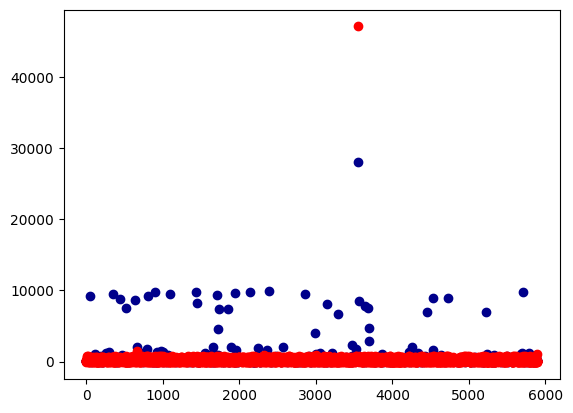

In [35]:
plt.scatter(index, y_test, color =  "darkblue")
plt.scatter(index, validation_predictions, color =  "red")

In [37]:
test_data_predictions

array([-27.56862347, 579.53546536,  44.642318  , ..., 535.60057756,
        96.87700134, 177.64286211])

In [39]:
test_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,2,0,0,1,0,545.171340,1,1,3903,21.262000,73.047700
1,1,1,1,2,0,800.000000,0,0,6484,18.966114,73.148278
2,1,0,0,2,0,1257.096513,1,1,6092,22.592200,88.484911
3,1,0,0,3,0,1400.329489,1,1,3843,26.988300,75.584600
4,2,0,0,1,0,430.477830,1,1,4995,22.700000,72.870000


In [43]:
len(test_data_predictions)

68720

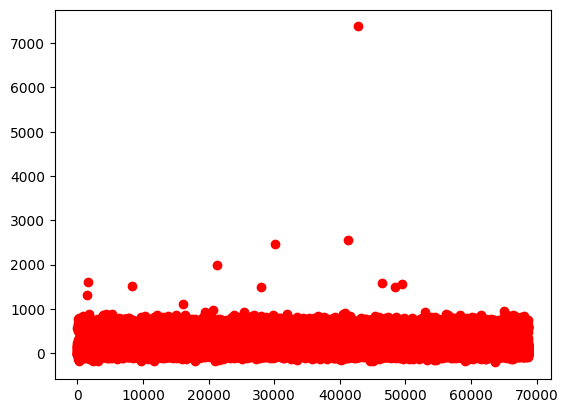

In [44]:
# visualise the test and validation predictions

# visualise the validation predictions

test_index = []
for i in range(len(test_data_predictions)):
    test_index.append(i)
# plt.scatter(test_index, test_data, color =  "darkblue")
plt.scatter(test_index, test_data_predictions, color =  "red")